# Загрузка данных и подготовка их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')


for item in [visits, orders, costs]: 
    display(item.info())
    display(item.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


## Подготовка данных

Поменяем названия столбцов, чтобы они соответствовали хорошему стилю и переведем тип данных в столбцах с датой и временем в соответствующий формат.

In [3]:
for item in [visits, orders, costs]: 
    item.columns = item.columns.str.lower()
    item.columns = [x.lower().replace(' ', '_') for x in item.columns.values]
    display(item.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [4]:
#visits = visits.rename(columns = {'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
#orders = orders.rename(columns = {'user id': 'user_id', 'event dt': 'event_dt'})
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(visits.info())
display(orders.info())
display(costs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

## Вывод подготовки данных

Мы поменяли тип данных в столбцах с датой и временем и переименовали столбцы в соответсвии со стилем snake_case. Можно приступать к заданию функций для расчета и анализа LTV, ROI, удержания и конверсии, а потом к исследовательскому анализу данных.

# Функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Зададим функцию get_profiles(), которая будет создавать пользовательские профили с датой первого посещения и источником перехода. В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию first().

In [5]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Теперь зададим функцию get_retention(), которая расчитывает коэффициент удержания. (Возможно переделать на более сложную)

In [6]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Следующая функция у нас get_conversion(). Она расчитывает конверсию - процент пользователей когорты, совершивших какое-нибудь действие. Например, зарегистрировавшихся на сайте, кликнувших по баннеру или добравшихся до определённого уровня в мобильной игре.

In [7]:
def get_conversion(
    profiles,
    purchases,# =orders
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Следующей функцией добавим get_ltv(), которая будет рассчитывать LTV - «пожизненную ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. Эта функция будет расчитывать и ROI - окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC(стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг). Ещё говорят: на сколько процентов «окупились» клиенты.

In [8]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Также нам понадобятся функции для визуализации наших результатов. plot_retention() - функция для визуализации удержания клиентов, plot_conversion() - функция для визуализации конверсии и plot_ltv_roi() - для визуализации пожизненной ценности и окупаемости.

In [9]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

# пример вызова: plot_retention(retention, retention_history, 7) 

In [10]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


# # пример вызова
# conversion_raw, conversion, conversion_history = get_conversion(
#     profiles_big,
#     orders_big,
#     datetime(2018, 1, 1).date(),
#     7,
#     dimensions=['channel'],
# )
# plot_conversion(conversion, conversion_history, 7) 

In [11]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# пример вызова # считаем LTV, CAC и ROI
# ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
#     profiles_big,
#     orders_big,
#     datetime(2018, 1, 1).date(),
#     7,
#     dimensions=['channel'],
# )
# plot_ltv_roi(ltv, ltv_history, roi, roi_history, 7) 

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Вывод ввода функций

Мы ввели такие функции, как  get_profiles(), get_retention(), get_conversion(), get_ltv(), а также plot_retention(), plot_conversion(), plot_ltv_roi() и filter_data(). Объяснили за что отвечает каждая из этих функций и что делает. Теперь можем приступать к исследовательскому анализу данных.

# Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Для начала построим пользовательские профили

In [13]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Найдем минимальную и максимальную дату привлечения пользователей

In [14]:
profiles['dt'].min()
#profiles['dt'].mах()

datetime.date(2019, 5, 1)

Минимальная дата привлечения пользователей 01.05.2019

In [15]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

Максимальная дата привлечения пользователей 27.10.2019. Теперь посмотрим из каких стран приходят посетители и какие страны дают больше всего платящих пользователей.

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
profiles.groupby('region').agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.07
Germany,14981,0.04
UK,17575,0.04
France,17450,0.04


Приходят пользователи из США, Германии, Великобритании и Франции(наибольшее число пользователей пришло из США), больше всего платящих пользователей приходит так же из США, потом идут пользователи из Германии и в конце нашего топа пользователи из Великобритании и Франции. Теперь посмотрим какими устройствами они пользуются и с каких устройств чаще всего заходят платящие пользователи.

In [17]:
profiles.groupby('device').agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.06
iPhone,54479,0.06
Android,35032,0.06
PC,30455,0.05


Самая популярная платформа - iPhone, а наибольшая доля платящих пользователей на платформе Mac. Дальше посмотрим по каким рекламным каналам шло привлечение пользователей и какие каналы приносят больше всего платящих пользователей.

In [18]:
profiles.groupby('channel').agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.12
AdNonSense,3880,0.11
lambdaMediaAds,2149,0.10
TipTop,19561,0.10
RocketSuperAds,4448,0.08
WahooNetBanner,8553,0.05
YRabbit,4312,0.04
MediaTornado,4364,0.04
LeapBob,8553,0.03


Наибольший процент платящих пользователей приходит из канала FaceBoom, а наибольшее количество пользователей пришло естественным путем, но к сожалению "органические" пользователи реже всех становятся платящими.

## Выводы исследователького анализа

Мы построили профили пользователей и определите минимальную и максимальную дату привлечения пользователей.

А также выяснили, что:

- Приходят пользователи из США, Германии, Великобритании и Франции(наибольшее число пользователей пришло из США), больше всего платящих пользователей приходит так же из США, потом идут пользователи из Германии и в конце нашего топа пользователи из Великобритании и Франции.
- Самая популярная у наших пользователей платформа - iPhone, а наибольшая доля платящих пользователей на платформе Mac.
- Наибольший процент платящих пользователей приходит из канала FaceBoom, а наибольшее количество пользователей пришло естественным путем.
- Большая часть пользователей заходит с мобильных устройств.

Еще стоит отметить:

- Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
-  Определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируется;
- При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить;
- Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. 

Можно приступать к изучению маркетинговых вопросов.

# Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и визуализируем изменения метрик во времени.

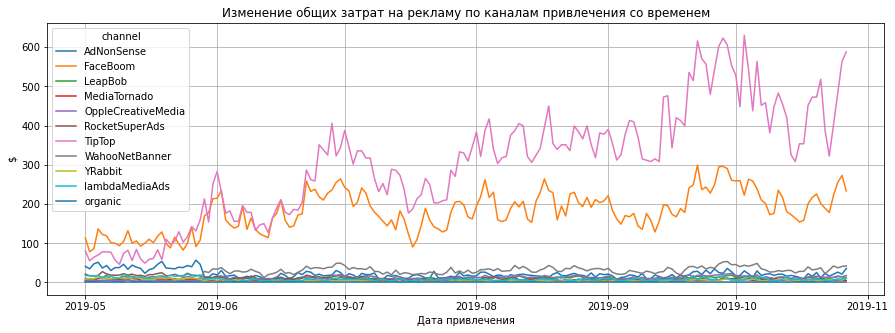

In [19]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='acquisition_cost',  # стоимость привлечения пользователя
    aggfunc='sum',  # подсчет суммы расходов
).plot(figsize=(15, 5), grid=True)
plt.ylabel('$')
plt.xlabel('Дата привлечения')
plt.title('Изменение общих затрат на рекламу по каналам привлечения со временем')


plt.show()

Теперь посчитаем, сколько в среднем стоило привлечение одного пользователя из каждого источника.

In [20]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by = 'acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Таким образом, самые дорогие пользователи приходили из TipTop. Из FaceBoom и AdNonSense цена за пользователя сопоставима. Расчитаем САС всего проекта.

In [21]:
#cac всего проекта
print('CAC всего проекта =', (profiles['acquisition_cost'].sum()/profiles.query('channel != "organic"')['user_id'].count()).round(2))

CAC всего проекта = 1.13


Еще посмотрим на изменение стоимости затрат на привлечение одного клиента со временем.

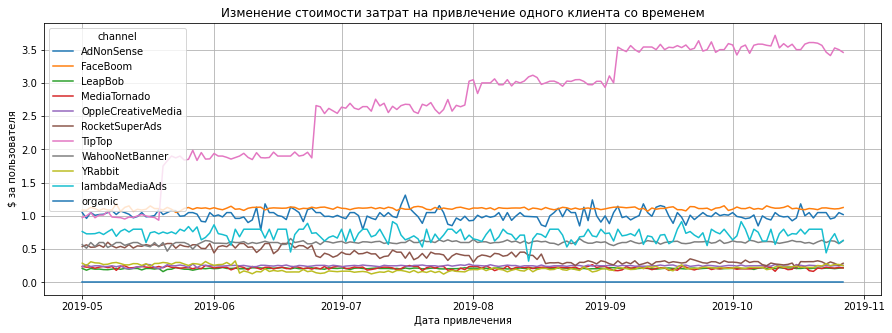

In [22]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='acquisition_cost',  # стоимость привлечения пользователя
    aggfunc='mean',  # подсчет суммы расходов
).plot(figsize=(15, 5), grid=True)
plt.ylabel('$ за пользователя')
plt.xlabel('Дата привлечения')
plt.title('Изменение стоимости затрат на привлечение одного клиента со временем')
plt.show()

## Выводы исследования маркетинга

Мы посчитали общую сумму расходов на маркетинг. Выяснили, как траты распределены по источникам и визуализировали изменения метрик во времени. А так же узнали, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитали средний CAC на одного пользователя для всего проекта(1.13) и для каждого источника трафика(наибольший получился у TipTop).

# Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [23]:
observation_date = datetime(2019, 10, 1).date()  # момент анализа
horizon_days = 14

profiles  = profiles.query('channel != "organic"')

### Проанализируем общую окупаемость рекламы

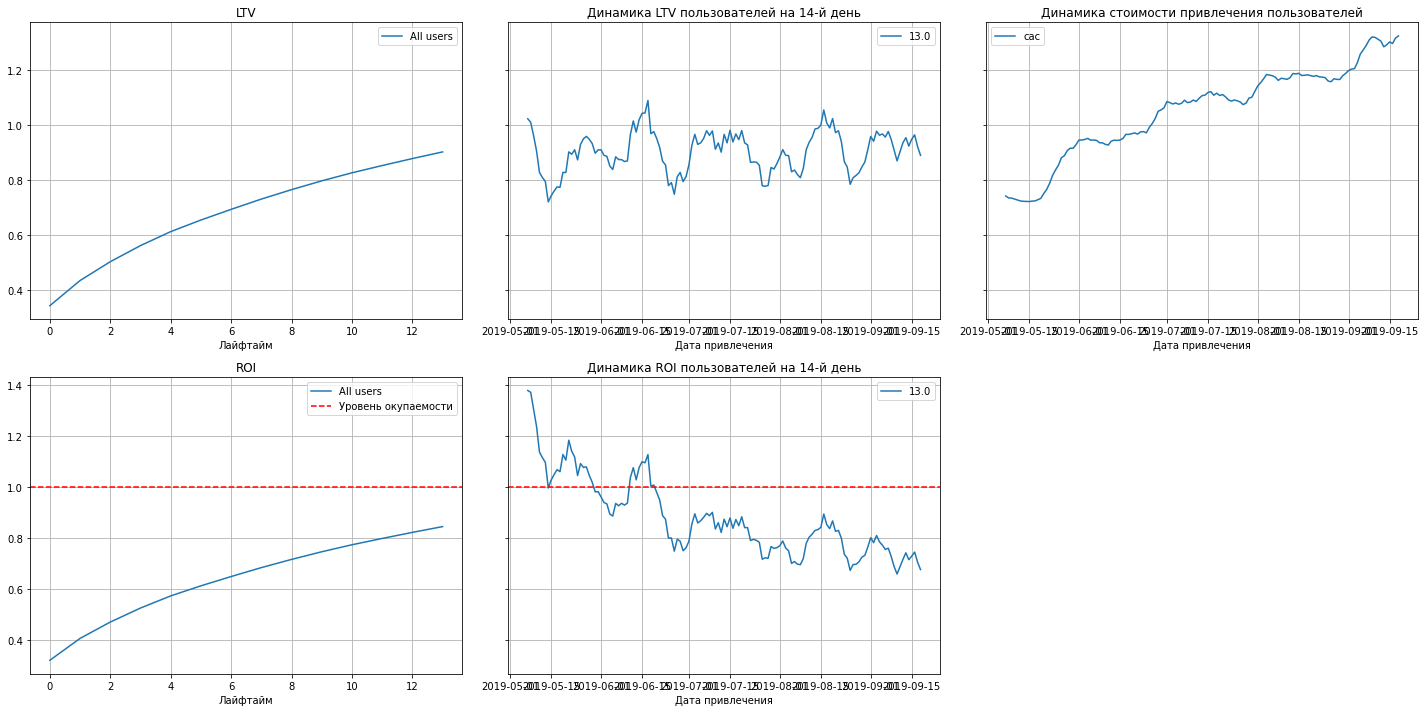

In [24]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC увеличивается. Значит, рекламный бюджет вырос за 4 месяца. Рост CAC - влкад Tip Top, потому что по всем остальным каналам была стабильный САС.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
Начнём с разбивки по устройствам.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

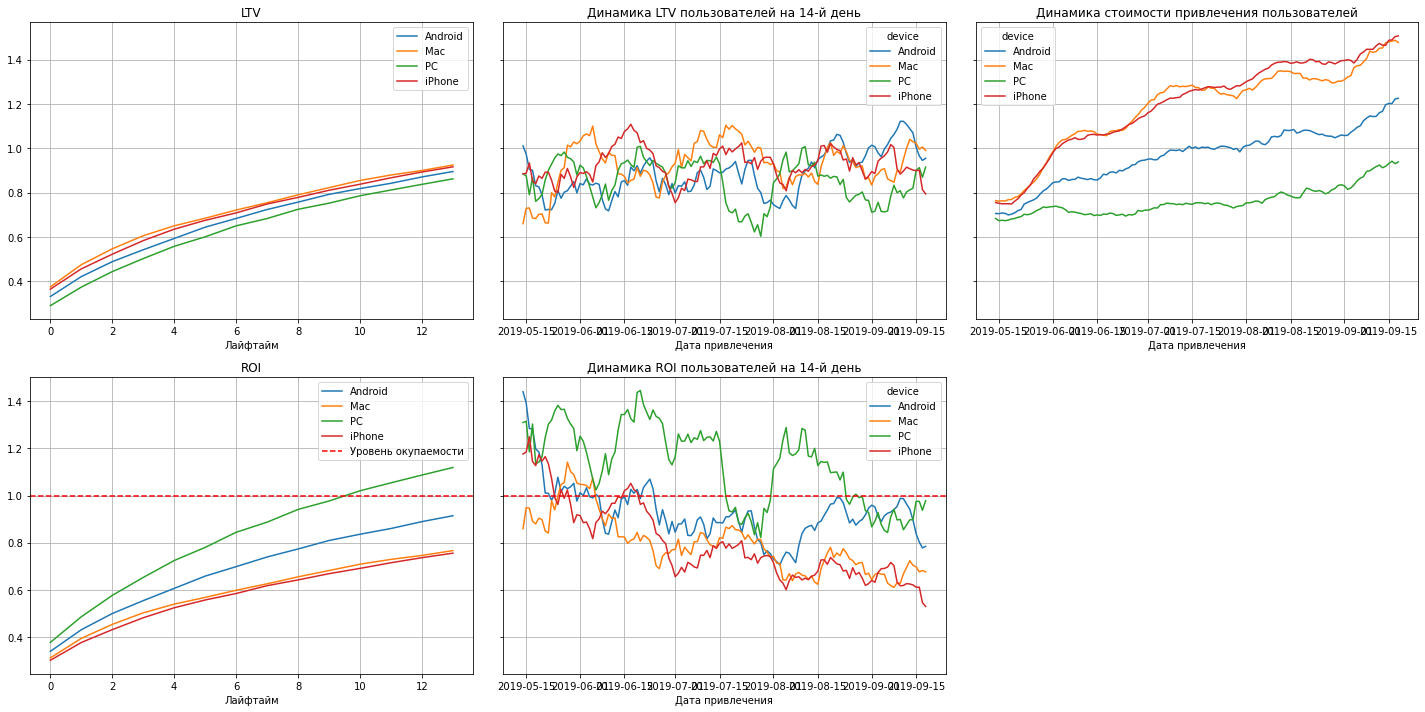

In [25]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

С разбивкой по странам всё тоже стабильно плохо.
Вот что говорят графики:
- Реклама окупается только на PC, а на Mac, iPhone и Android(но получше, чем  Mac, iPhone) нет.
- Стоимость привлечения стабильно растет и ведет себя схоже на всех платформах, пользователи Mac и iPhone самые дорогие, пользователи Android немного дешевле, самые дешевые пользователи PC.
- LTV всё так же подвержен сезонности, но стабилен.
Лучше всего окупаются пользователи PC, а в явных аутсайдерах у нас пользователи Mac и iPhone.

Посмотрим на окупаемость по странам.

### Проанализируем окупаемость рекламы с разбивкой по странам

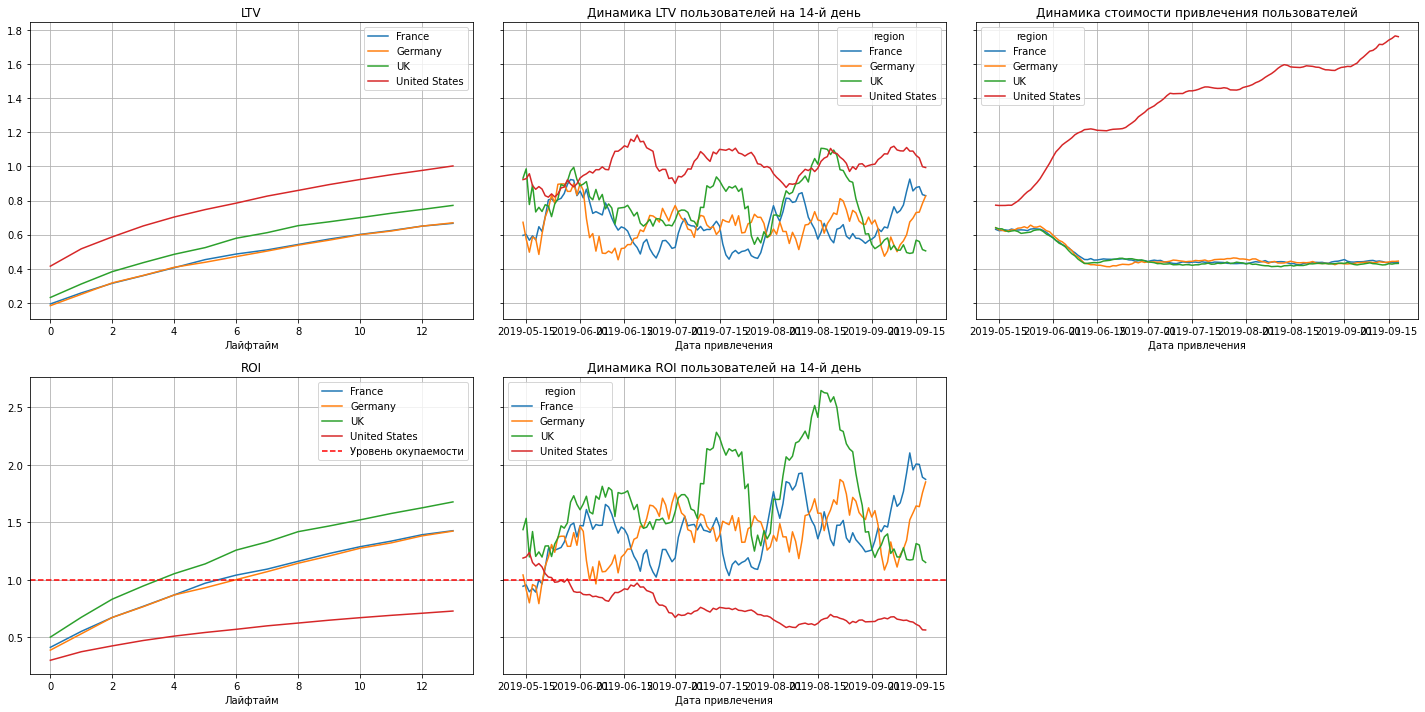

In [26]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Здесь уже заметна плохая окупаемость рекламы в США, хотя в других регионах окупается отлично. LTV всё так же подвержен сезонности, но стабилен и в США повыше, чем в других странах. Стоимость привлечения так же сильно выше в США, чем в других странах. Похоже, что пользователей из США есть проблемы. Изучим их подробнее после того, как посмотри окупаемость по рекламным каналам. Есть предположенние, что все проблемы яблочников и пользователей из США связаны с рекламным каналом.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

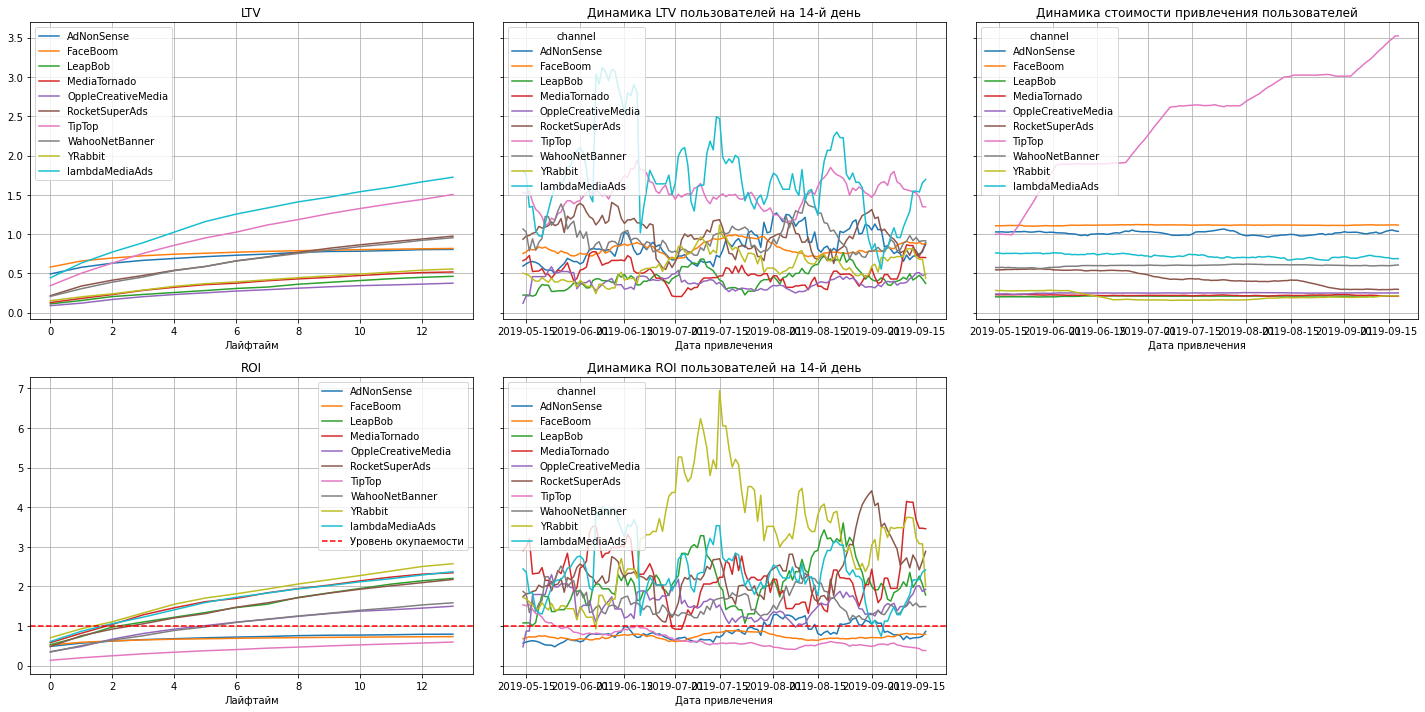

In [27]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот и еще одна зацепка, реклама из TipTop, AdNonSense и  FaceBoom не окупается, можно еще заметить, что эти каналы лидеры по стоимости привлечения пользователей, особенно из TipTop она увеличивалась постоянно стоит изучить конверсию и удержание этой и других зацепок.

## Дополнительное изучение зацепок

У нас есть низкая окупаемость по странам в США, по каналам привлечения в TipTop, AdNonSense и FaceBoom, по платформам Mac и iPhone. Посчитаем и визуализируем конверсию для них.

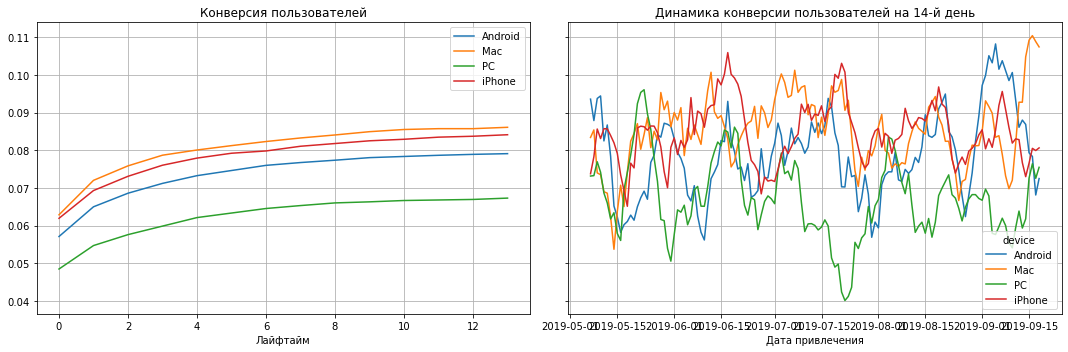

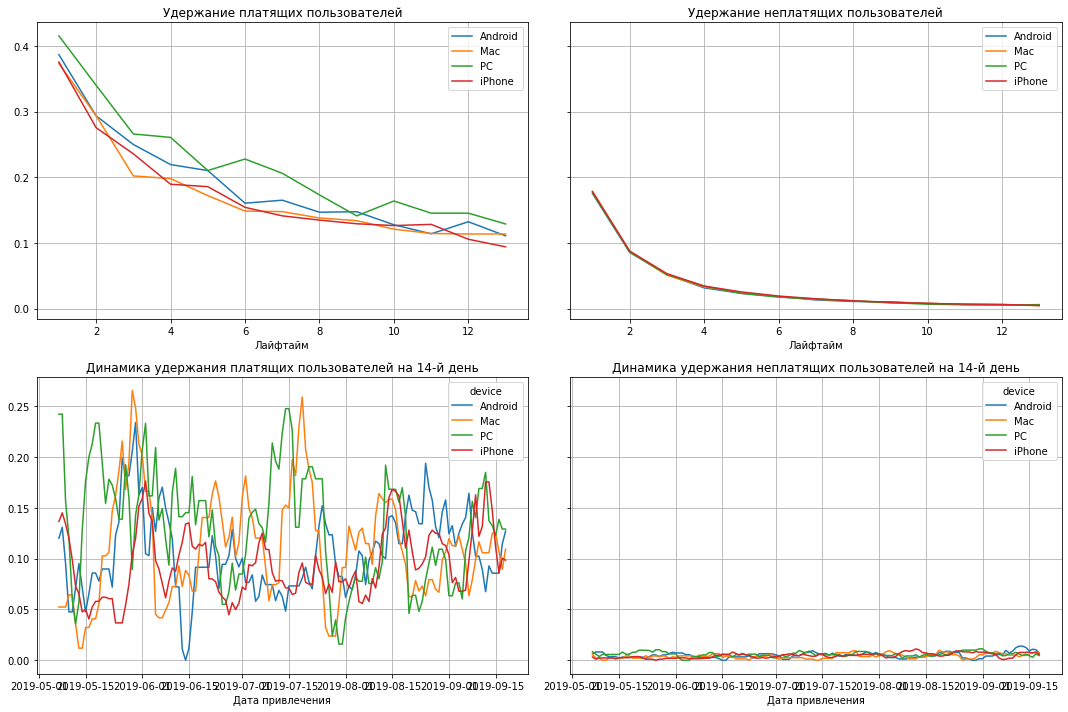

In [28]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Судя по графикам, пользователи Android, Mac и iPhone конвертируются очень хорошо, причём постоянно. Но дело и не в удержании, с удержанием на Android, Mac и iPhone тоже все сопоставимо с PC. Видимо дело не в платформе, посмотрим, как обстоят дела в разбивке по странам.

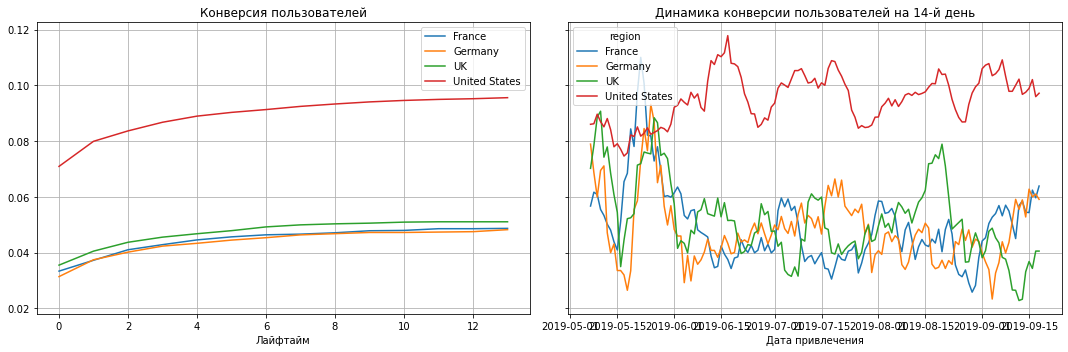

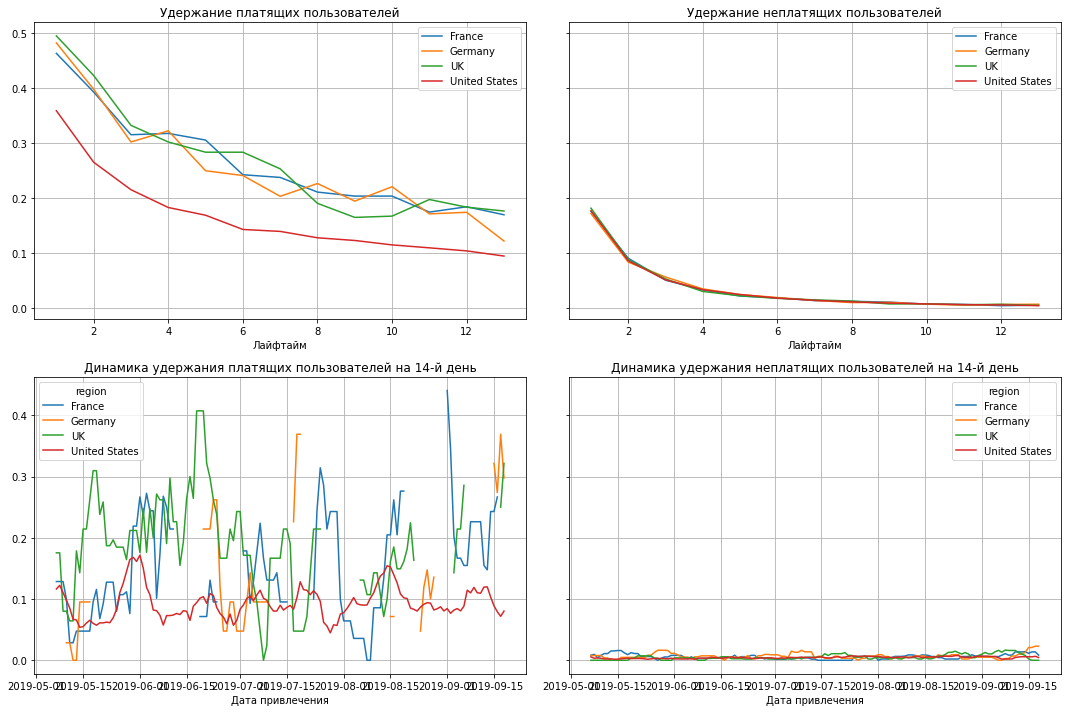

In [29]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия в США выше чем в других старнах, а удержание платящих ниже на 10% чем в других странах. Возможно стоит развиваться на других рынках, в США видимо очень конкурентно для нашего продукта и пользователи плохо удерживаются. Посмотрим, как обстоят дела с каналами привлечения.

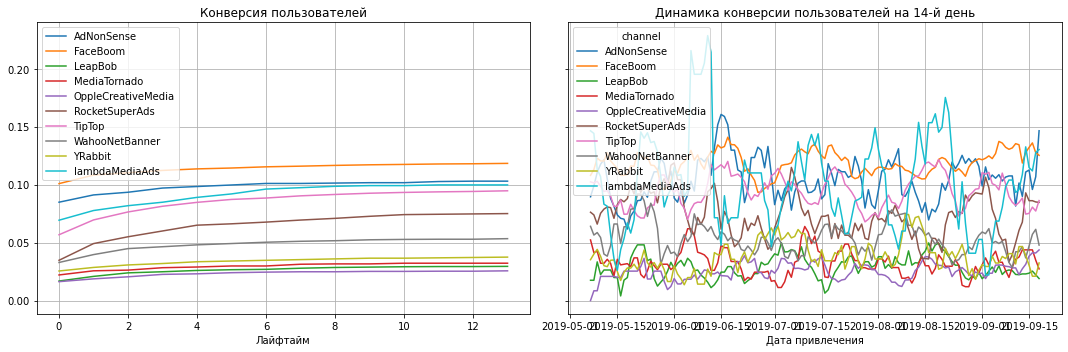

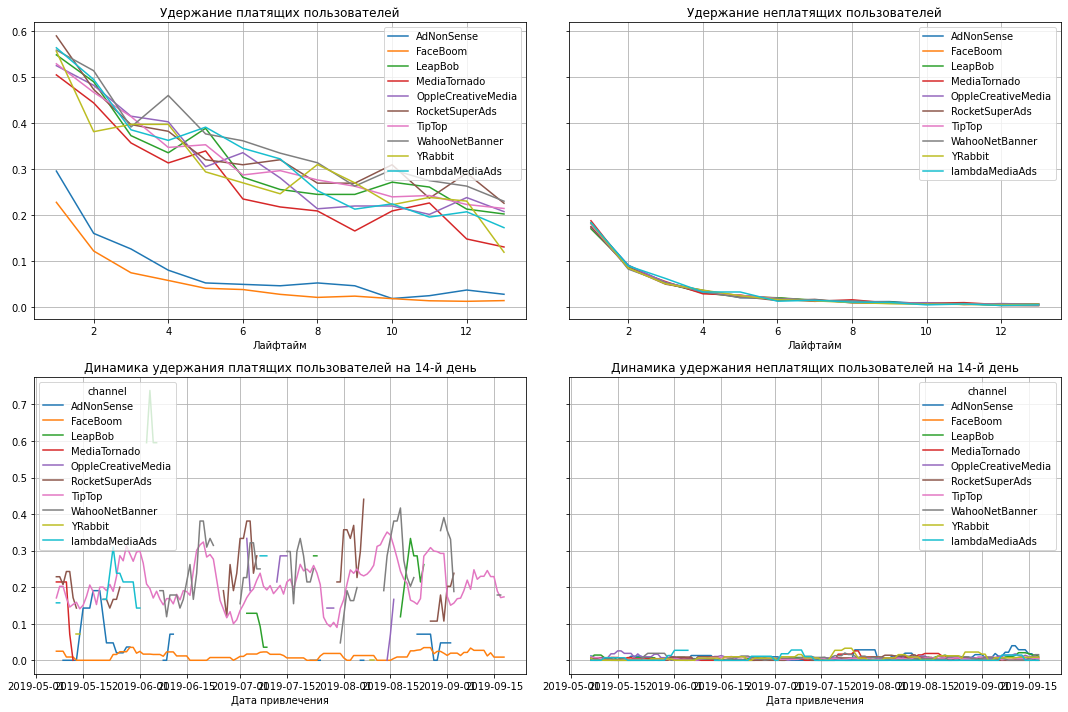

In [30]:
# смотрим конверсию с разбивкой по каналам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей из TipTop, AdNonSense и FaceBoom высокая, даже выше чем в среднем по другим источникам, а удержание пользователей из AdNonSense и FaceBoom ниже на 10-20%, чем из других источников, пользовотели почти не удерживаются. Возможно стоит заказывать рекламу из других источников, например, из lambdaMediaAds пользователи и конвертируются хорошо и удерживаются, то есть если приоритетный по бюджету сейчас TipTop, то стоит перейти на приоритет lambdaMediaAds.

In [31]:
profiles.groupby(['device', 'region']).agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = 'device', ascending=False)

user_id  payer
device  region                       
iPhone  France            2198   0.05
        Germany           1862   0.05
        UK                2274   0.05
        United States    27548   0.10
PC      France            4384   0.05
        Germany           3797   0.05
        UK                4551   0.05
        United States     6421   0.10
Mac     France            1163   0.06
        Germany           1020   0.05
        UK                1086   0.05
        United States    15424   0.10
Android France            3313   0.04
        Germany           2849   0.05
        UK                3243   0.05
        United States    12436   0.11

Попытался найти связь между США и iPhone и Mac, возможно имеется связь между США и iPhone и Mac, двусторонняя или односторонняя непонятно(нужно больше изучать этот регион), но пользователей этих платформ больше именно в США.

In [32]:
profiles.groupby(['channel', 'region']).agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = 'channel', ascending=False)

user_id  payer
channel            region                       
lambdaMediaAds     UK                 758   0.10
                   Germany            649   0.10
                   France             742   0.11
YRabbit            United States     4312   0.04
WahooNetBanner     UK                3003   0.05
                   Germany           2579   0.06
                   France            2971   0.05
TipTop             United States    19561   0.10
RocketSuperAds     United States     4448   0.08
OppleCreativeMedia UK                3052   0.03
                   Germany           2562   0.02
                   France            2991   0.03
MediaTornado       United States     4364   0.04
LeapBob            UK                3046   0.03
                   Germany           2519   0.03
                   France            2988   0.03
FaceBoom           United States    29144   0.12
AdNonSense         Germany           1219   0.12
                   UK                1295   0.11
                   France            1366   0.11

Вот и видна связь между каналом TipTop и страной США, просадка удержания и окупаемости пользователей из США связана с тем, что из канала TipTop привлекались только пользователи из США, посмотрим как ведут себя пользователи стран пришедшие не из канала TipTop.

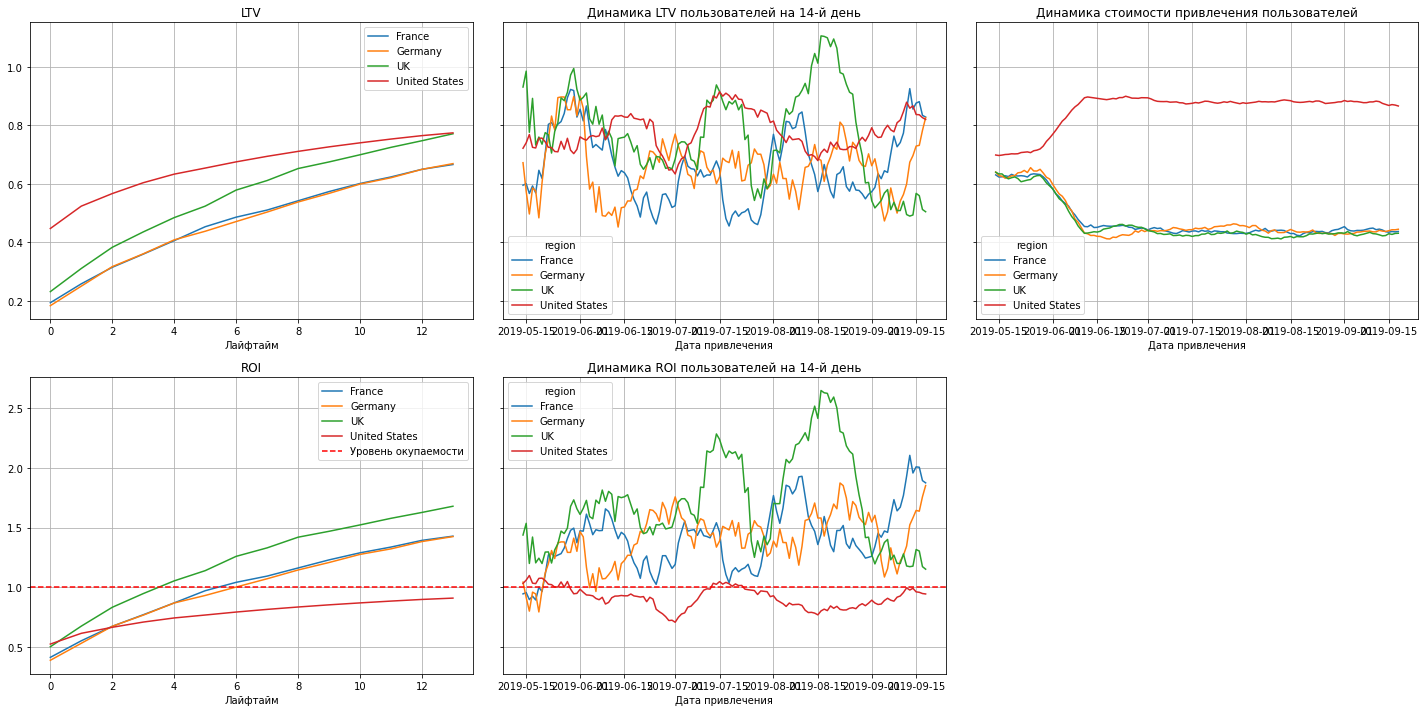

In [33]:
profiles  = profiles.query('channel != "TipTop"')

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот уже и США  почти окупаются, а теперь глянем, как себя ведут остальные пользователи без AdNonSense и FaceBoom.

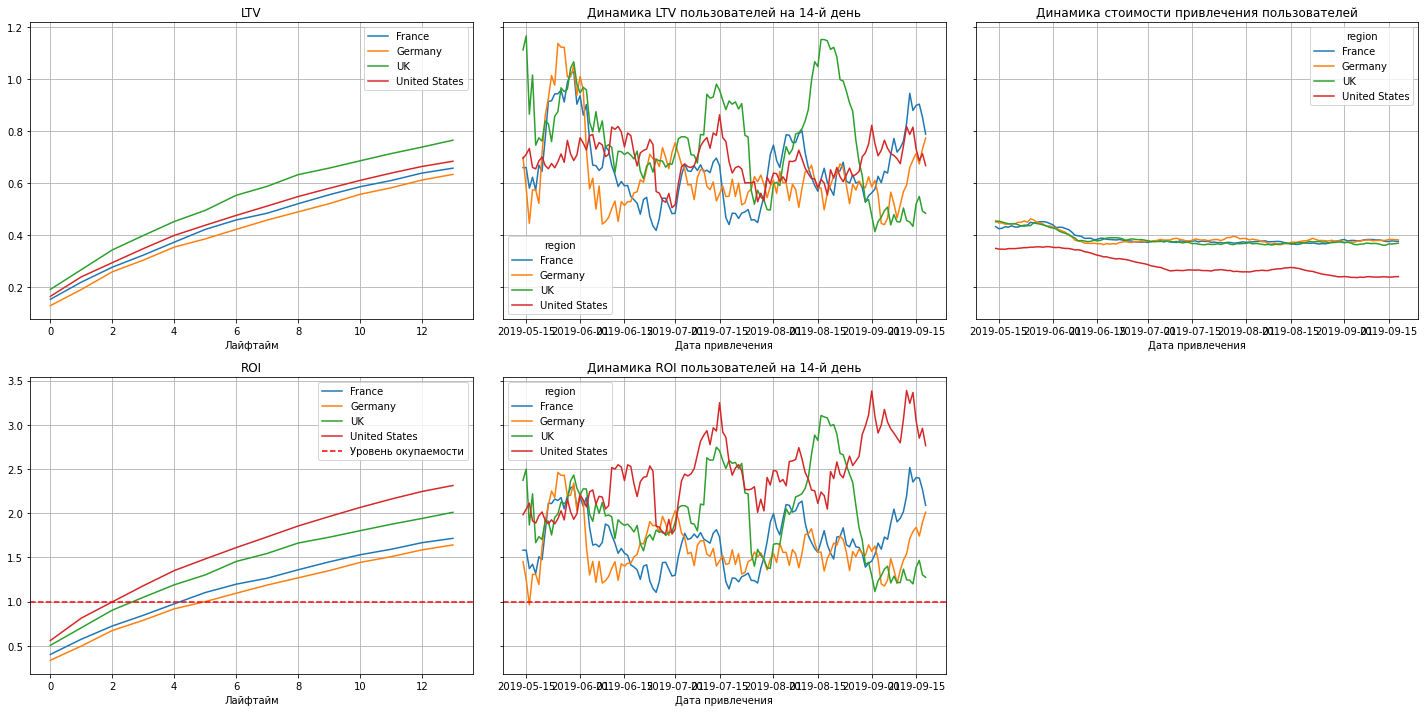

In [34]:
profiles  = profiles.query('channel !=  "AdNonSense" & channel !=  "FaceBoom"')

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как можно увидеть, что без проблемных каналов привлечения пользователи из США ведут себя как и должны были вести окупаются отлично, инвестиции просели немного, но это из-за того что почти все инвестиции были в проблемном канале. Посмотрим конверсию и  удержание. 

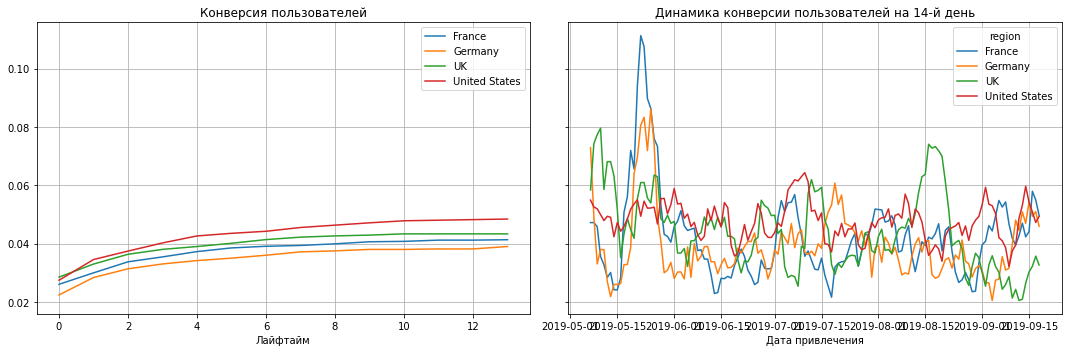

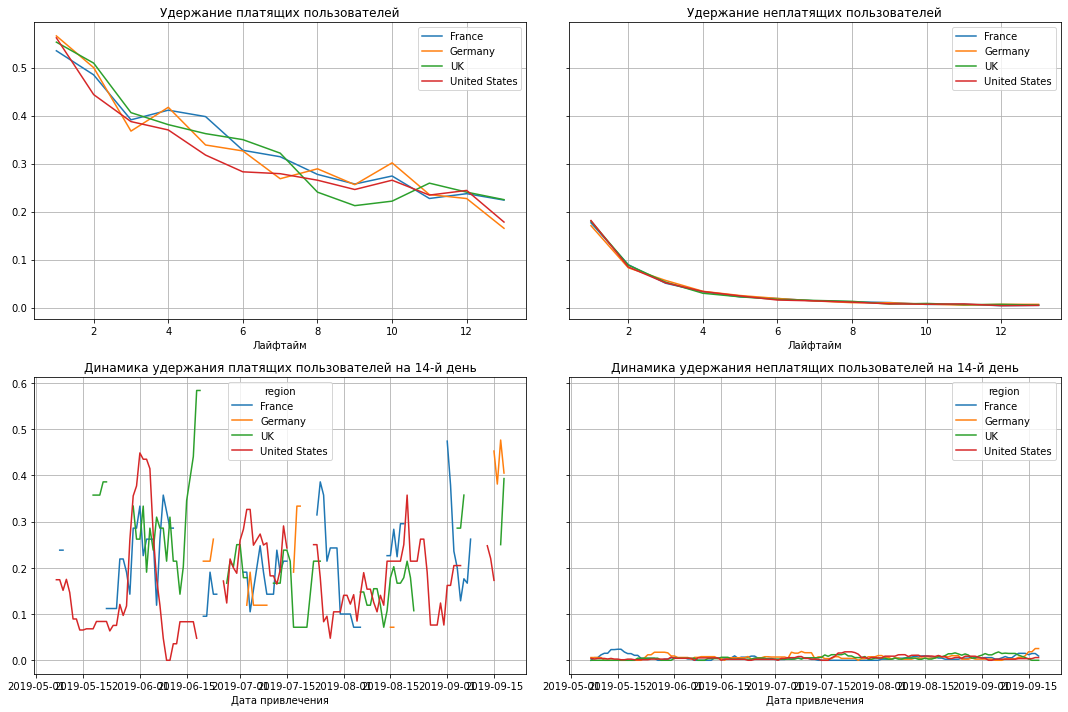

In [35]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

С конверсией и удержанием все стало тоже как и в среднем по больнице, проблема найдена. Посмотрим, как стали вести себя устройства.

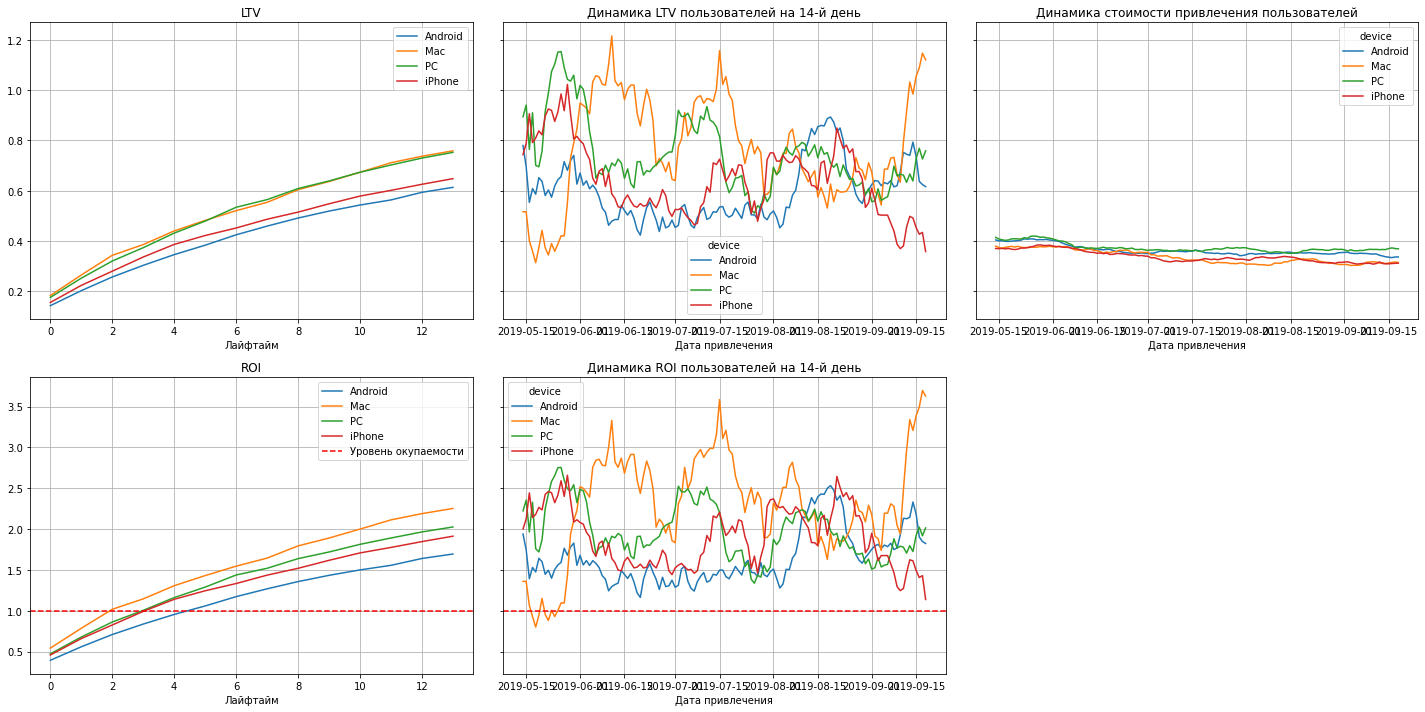

In [36]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

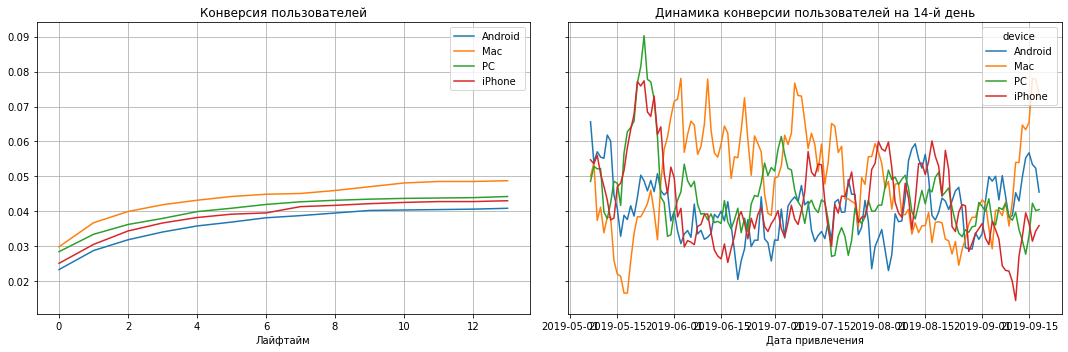

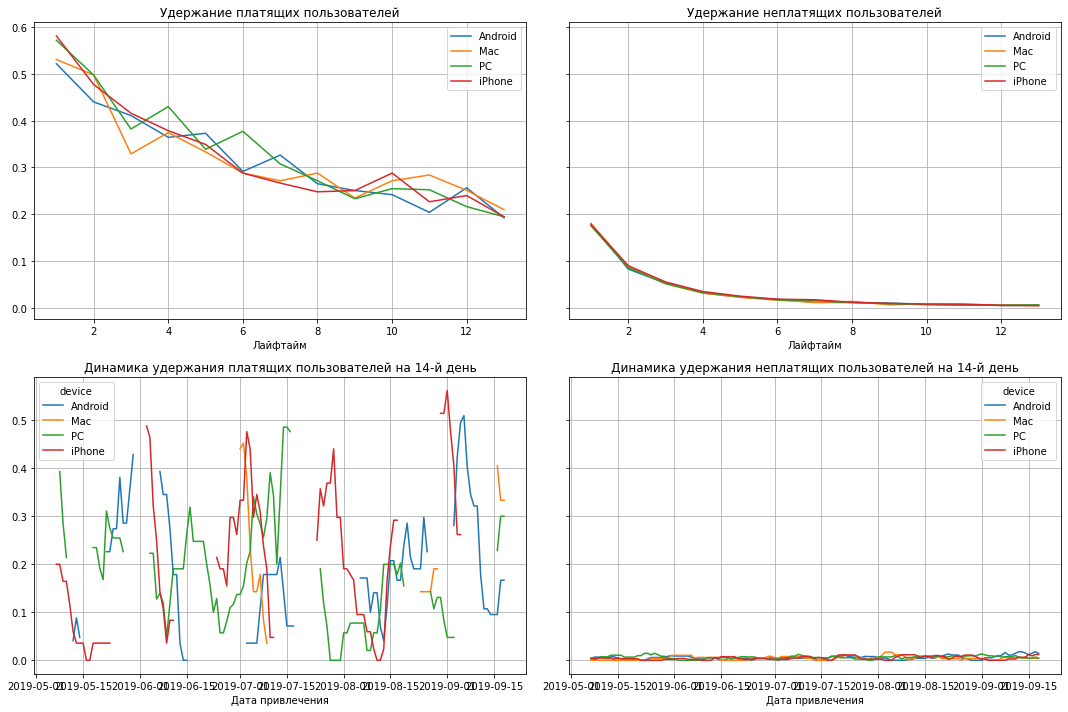

In [37]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь тоже все нормализовалось, значит проблема была в трех каналах привлечения. Единственное, что сейчас просела конверсия пользователей мобильных устройств, исключили именно те каналы, которые привлекали пользователей мобильных устройств. А так как в наше приложение заходят больше с мобильных устройств, то стоит изучить, какие каналы специализируются на нашей целевой аудитории, чтобы максимизировать показатели.

In [38]:
#profiles = get_profiles(visits, orders, costs)
profiles.groupby(['channel', 'device']).agg({'user_id': 'nunique','payer': 'mean'}).sort_values(by = ['payer', 'channel'], ascending=False)

user_id  payer
channel            device                 
lambdaMediaAds     iPhone       433   0.13
                   Mac          241   0.11
                   PC           862   0.10
                   Android      613   0.09
RocketSuperAds     iPhone      1917   0.09
                   Mac         1137   0.09
                   PC           466   0.07
                   Android      928   0.06
WahooNetBanner     Android     2577   0.06
                   PC          3409   0.05
                   Mac          856   0.05
YRabbit            Android      865   0.05
WahooNetBanner     iPhone      1711   0.05
YRabbit            PC           482   0.04
MediaTornado       Mac         1105   0.04
OppleCreativeMedia Mac          882   0.04
MediaTornado       PC           453   0.04
YRabbit            Mac         1097   0.04
                   iPhone      1868   0.03
MediaTornado       Android      879   0.03
                   iPhone      1927   0.03
LeapBob            Android     2580   0.03
                   PC          3402   0.03
                   Mac          880   0.03
OppleCreativeMedia iPhone      1701   0.03
                   PC          3496   0.03
LeapBob            iPhone      1691   0.02
OppleCreativeMedia Android     2526   0.02

Чтобы поднять мобильный трафик(так как это наша целевая аудитория, с мобильных устройств заходят чаще) предлагаю маркетинговому отделу перенести внимание на такие каналы, как lambdaMediaAds, RocketSuperAds, WahooNetBanner у нихвысокая конверсия в платящих и на мобильных устройствах и на десктопных.

# Выводы


В ходе анализа окупаемости рекламы мы нашли три проблемных места окупаемости рекламы:
- Низкая окупаемость в США 
- Низкая окупаемость на платформах Android, iPhone и Mac
- Низкая окупаемость из каналов TipTop, AdNonSense и FaceBoom, а также высокие траты на рекламу в TipTop

Проанализировав все предположения, мы пришли к выводу, что неэффективность в США(хотя это наш основной рынок, больше всего пользователей заходит оттуда) была связана с неокупаемостью пользователей из каналов TipTop, AdNonSense и FaceBoom. Причем пользователи из TipTop были по качеству как и из других каналов, но не окупались из-за постоянно растущей на них цены. Здесь варианта два: либо отказываемся от этого канала, либо не соглашаемся на повышение цены. Скорее всего со вторым вариантом не согласятся в компании TipTop, поэтому остается только первый, тем более их можно заменить другим каналом(об этом далее). Из AdNonSense и FaceBoom пользователи хорошо конвертировались, но плохо удерживались, видимо там не наша целевая аудитория, поэтому тоже откажемся от этих каналов. Остальные каналы ведут себя примерно похоже, но есть небольшой лидер это lambdaMediaAds, предлагаю с ним работать приоритетно, потому что из оставшихся компаний, конвертация в платящих лучше именно у lambdaMediaAds, к тому же у них и высокая конвертация мобильных пользователей(откуда к нам заходят чаще всего). Так же стоит обратить внимание на такие каналы, как RocketSuperAds, WahooNetBanner, пользователи из этих каналов тоже довольно высокого качества.

Также стоит обратить внимание на азиатский регион, потому что мы там совсем не представлены. Но для начала конечно разобраться с проблемами описанными выше.